# Задание 1

Возьмём датасет, содержащий 200 записей о росте (в дюймах) и весе (в фунтах) 18-летних людей с этого сайта http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights. На нём и будем решать задачу линейной регрессии.




In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
file_wh = "file_1.txt"

In [27]:
def get_wh_points():
  f = open(file_wh, 'r')

  points_wh = []
  for f_str in f.readlines():
      if not f_str.isspace():
          _, x, y = map(float, f_str.split())
          points_wh.append(np.array([x, y]))

  return points_wh


def get_simple_points():
  f = open("simple_file.txt", 'r')
  points = []
  for f_str in f.readlines():
      if not f_str.isspace():
          _, x, y = map(float, f_str.split())
          points.append(np.array([x, y]))
  return points

def get_simple_points_with_up():
    f = open("simple_points_with_up.txt", 'r')
    points = []
    for f_str in f.readlines():
        if not f_str.isspace():
            _, x, y = map(float, f_str.split())
            points.append(np.array([x, y]))
    return points


In [28]:
def show_points(points, title=""):
  x = [p[0] for p in points]
  y = [p[1] for p in points]
  
  plt.scatter(x, y, s = 10)
  plt.title(title)
  plt.show()


def show_points_and_line(X, Y, points, title=""):
  x = [p[0] for p in points]
  y = [p[1] for p in points]
  
  plt.scatter(x, y, s = 10)
  plt.title(title)
  plt.plot(X, Y, color="g")
  plt.show()



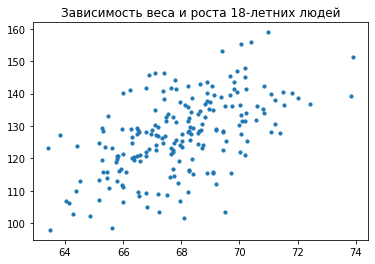

In [29]:
try:
  show_points(get_wh_points(), "Зависимость веса и роста 18-летних людей")
except FileNotFoundError:
  print("File wasn't uploaded")

Будем подбирать параметры a и b линейной функции a * x + b = y, минимизируя сумму наименьших квадратов ошибок - MSE методом градиентного спуска

In [30]:
def MSE(true_points, coeffs):
  sum = 0
  a = coeffs[0]
  b = coeffs[1]
  for point in true_points:
    sum += pow((point[1] - (point[0] * a + b)), 2) 
  return sum 

# её градиент
def grad_MSE(points, coeffs, batch_size):
  sum_a = 0
  sum_b = 0
  dataset_size = len(points)
  if batch_size == dataset_size:
    for i in range(batch_size):
      x_i = points[i][0]
      y_i = points[i][1]
      sum_a += -2 * x_i * (y_i - (coeffs[0] * x_i + coeffs[1]))
      sum_b += -2 * (y_i - (coeffs[0] * x_i + coeffs[1]))
  else:
    j = 0
    while j < batch_size:
      i = random.randint(0, dataset_size - 1)
      x_i = points[i][0]
      y_i = points[i][1]
      sum_a += -2 * x_i * (y_i - (coeffs[0] * x_i + coeffs[1]))
      sum_b += -2 * (y_i - (coeffs[0] * x_i + coeffs[1]))
      j += 1
    

  '''print(sum_a, sum_b, "<- sums")'''
  return np.array([sum_a , sum_b])



Сама реализация стохастического градиентного спуска (для начала с размером батча = n, то есть обычного градиентного спуска):

In [31]:
import random
const_lr = 0.0000002

EPS = 1E-2
def shocasticGD(batch_size, points, start_coeffs, lr=const_lr, epoch = 3000, diff=False):
    i = 0
    coeffs = start_coeffs
    prev_coeffs = start_coeffs + 0.1
    print(MSE(points, coeffs), "<- start MSE")
    diffs=[]
    while i == 0 or i < epoch and abs(MSE(points, prev_coeffs) - MSE(points, coeffs)) > EPS:
      prev_coeffs = coeffs
      coeffs = coeffs - lr * grad_MSE(points, prev_coeffs, batch_size)
      #print("for i = ", i, "coeffs:", coeffs, "prev:", prev_coeffs)
      '''print("res coefs for i =", i, coeffs)'''
      random.shuffle(points)
      #prev_coeffs = coeffs
      i += 1
      diffs.append(coeffs)
    
    print(MSE(points, coeffs), "<- min MSE")
    print("cnt epoches = ", i)
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs
wh_points = get_wh_points()
res_coeffs = shocasticGD(len(wh_points), wh_points, np.array([0.1, 0.1]))
print(res_coeffs, "<- res")



2923678.9014039994 <- start MSE
21468.486818698428 <- min MSE
cnt epoches =  22
[1.87163779 0.12590015] <- res


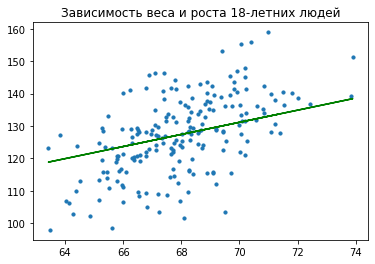

In [32]:
X = []
Y = []
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, get_wh_points(), "Зависимость веса и роста 18-летних людей")
except FileNotFoundError:
  print("File wasn't uploaded")

Работа нашего алгоритма для точек на прямой y = x: (увеличили lr и уменьшили кол-во эпох)

982.95 <- start MSE
3.525273809783652e+123 <- min MSE
cnt epoches =  100


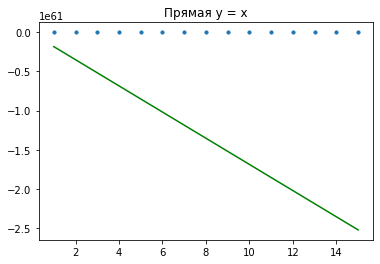

In [33]:
X = []
Y = []
simple_points = get_simple_points()
res_coeffs = shocasticGD(len(simple_points),simple_points, np.array([0.1, 0.1]), 0.002, 100)
for i in get_simple_points():
  X.append(i[0])
  Y.append(res_coeffs[0] * i[0] + res_coeffs[1])


try:
  show_points_and_line(X, Y, get_simple_points(), "Прямая y = x")
except FileNotFoundError:
  print("File wasn't uploaded")

Теперь для точек располагающихся на прямой y = x с резким выбросом одной точки:

1609.95 <- start MSE
185.7906154390718 <- min MSE
cnt epoches =  30


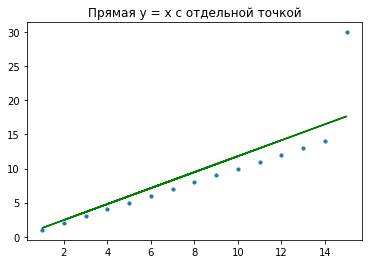

In [34]:
X = []
Y = []
simple_points_with_up = get_simple_points_with_up()
res_coeffs = shocasticGD(len(simple_points_with_up), simple_points_with_up, np.array([0.1, 0.1]), 0.0002, 30)
for i in simple_points_with_up:
  X.append(i[0])
  Y.append(res_coeffs[0] * i[0] + res_coeffs[1])


try:
  show_points_and_line(X, Y, get_simple_points_with_up(), "Прямая y = x с отдельной точкой")
except FileNotFoundError:
  print("File wasn't uploaded")

Теперь возьмём размер батча = 1:

2923678.9014039994 <- start MSE
22741.894885834114 <- min MSE
cnt epoches =  2163


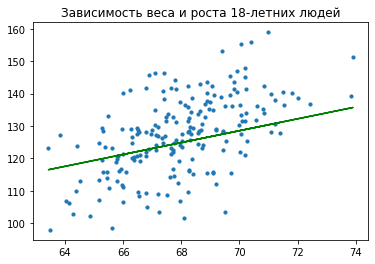

In [35]:
wh_points = get_wh_points()
res_coeffs = shocasticGD(1, wh_points, np.array([0.1, 0.1]))
X = []
Y = []
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, get_wh_points(), "Зависимость веса и роста 18-летних людей")
except FileNotFoundError:
  print("File wasn't uploaded")

Теперь MiniBatch (n / 2):

2923678.9014039994 <- start MSE
21468.44809568658 <- min MSE
cnt epoches =  524


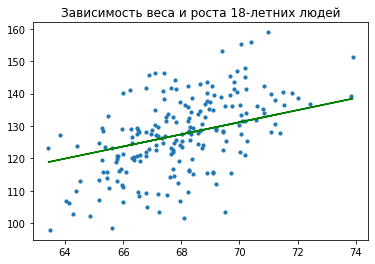

In [36]:
wh_points = get_wh_points()
res_coeffs = shocasticGD(len(wh_points) // 2, wh_points, np.array([0.1, 0.1]))
X = []
Y = []
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, get_wh_points(), "Зависимость веса и роста 18-летних людей")
except FileNotFoundError:
  print("File wasn't uploaded")

Видим, что результат линейной регрессии для размера батча = 1, вообще мало похож на правду, в то время как для miniBatch результат приближен к nGd, хотя кол-во вычислений функции в 2 раза меньше, что даёт сделать вывод о том, что miniBatch реализация является наиболее оптимальной.

# Задание 2

Теперь нормальзуем данные:

z_i = beta * z_i-1 + (1 - beta) * y_i

И на них запустим наш SGD


[array([ 65.78, 112.99]), array([ 71.52, 136.49]), array([ 69.4 , 153.03]), array([ 68.22, 142.34]), array([ 67.79, 144.3 ]), array([ 68.7, 123.3]), array([ 69.8 , 141.49]), array([ 70.01, 136.46]), array([ 67.9 , 112.37]), array([ 66.78, 120.67]), array([ 66.49, 127.45]), array([ 67.62, 114.14]), array([ 68.3 , 125.61]), array([ 67.12, 122.46]), array([ 68.28, 116.09]), array([ 71.09, 140.  ]), array([ 66.46, 129.5 ]), array([ 68.65, 142.97]), array([ 71.23, 137.9 ]), array([ 67.13, 124.04]), array([ 67.83, 141.28]), array([ 68.88, 143.54]), array([63.48, 97.9 ]), array([ 68.42, 129.5 ]), array([ 67.63, 141.85]), array([ 67.21, 129.72]), array([ 70.84, 142.42]), array([ 67.49, 131.55]), array([ 66.53, 108.33]), array([ 65.44, 113.89]), array([ 69.52, 103.3 ]), array([ 65.81, 120.75]), array([ 67.82, 125.79]), array([ 70.6 , 136.22]), array([ 71.8, 140.1]), array([ 69.21, 128.75]), array([ 66.8, 141.8]), array([ 67.66, 121.23]), array([ 67.81, 131.35]), array([ 64.05, 106.71]), array([

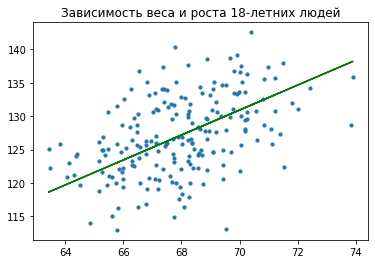

In [37]:
points_wh = get_wh_points()
print(points_wh)
beta = 0.6
for i in range(1, len(points_wh)):
  y_prev = points_wh[i - 1][1]
  y_i = points_wh[i][1]
  points_wh[i][1] = beta * y_prev + (1 - beta) * y_i


res_coeffs = shocasticGD(len(points_wh) // 2, points_wh, np.array([0.1, 0.1]))
X = []
Y = []
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, points_wh, "Зависимость веса и роста 18-летних людей")
except FileNotFoundError:
  print("File wasn't uploaded")




Видим, что предварительная нормализация данных позволила сильно уменьшить результат функции ошибки MSE (с тем же кол-вом эпох и lr):

с нормализацией: 5756.376040386974 <- min MSE

без: 21468.416572314003 <- min MSE


# Задание 3


(в этих модификациях метода стохастического градиентного спуска будем работать с miniBatch(n / 2), т.к. уже сделали вывод, что это самый оптимальный размер батча)

SGD with momentum:

2923678.9014039994 <- start MSE
21562.533084069702 <- min MSE


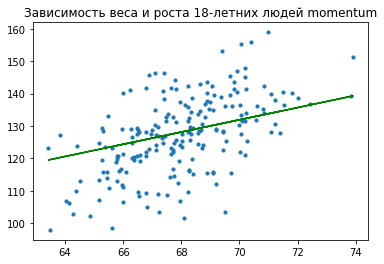

In [38]:
def shocasticGDmomentum(batch_size, points, start_coeffs, lr=const_lr, epoch = 100, diff=False):
    i = 0
    coeffs = start_coeffs
    print(MSE(points, coeffs), "<- start MSE")
    td_prev=coeffs
    beta = 0.8
    diffs = []
    while i < epoch:
      prev_coeffs = coeffs
      td = beta * td_prev + lr * grad_MSE(points, prev_coeffs, batch_size)
      td_prev = td
      coeffs -= td
      random.shuffle(points)
      diffs.append(coeffs)
      i += 1
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs

wh_points = get_wh_points()
res_coeffs = shocasticGDmomentum(len(wh_points) // 2, wh_points, np.array([0.1, 0.1]))
X = []
Y = []
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, get_wh_points(), "Зависимость веса и роста 18-летних людей momentum")
except FileNotFoundError:
  print("File wasn't uploaded")

Nesterov:

In [39]:
def shocasticGDnesterov(batch_size, points, start_coeffs, lr=const_lr, epoch = 100, diff=False):
    i = 0
    coeffs = start_coeffs
    print(MSE(points, coeffs), "<- start MSE")
    td_prev=coeffs
    beta = 0.8
    diffs = []
    while i < epoch:
      prev_coeffs = coeffs
      for j in points:
        j -= beta * td_prev
      td = beta * td_prev + lr * grad_MSE(points, prev_coeffs, batch_size)
      td_prev = td
      coeffs -= td
      diffs.append(coeffs)
      random.shuffle(points)
      i += 1
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs

2923678.9014039994 <- start MSE
21556.415869225344 <- min MSE


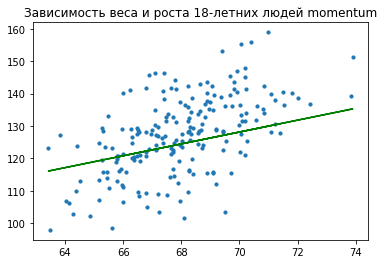

In [40]:
wh_points = get_wh_points()
res_coeffs = shocasticGDnesterov(len(wh_points) // 2, wh_points, np.array([0.1, 0.1]))
X = []
Y = []
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, get_wh_points(), "Зависимость веса и роста 18-летних людей momentum")
except FileNotFoundError:
  print("File wasn't uploaded")

AdaGrad (адаптивный градиентный алгоритм):

2923678.9014039994 <- start MSE
2923666.5218191347 <- min MSE
[0.10000372 0.10000372] <- res


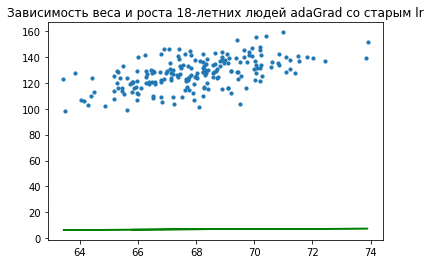

2923678.9014039994 <- start MSE
21706.2956038537 <- min MSE
[1.86169366 1.75898159] <- res


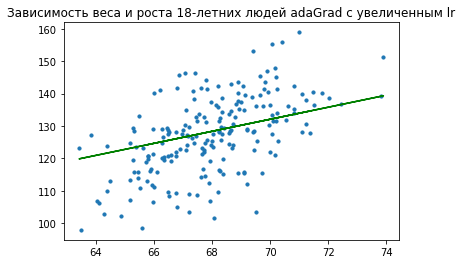

In [41]:
def shocasticGDAdaGrad(batch_size, points, start_coeffs, lr=const_lr, epoch = 100, diff=False):
    i = 0
    coeffs = start_coeffs
    print(MSE(points, coeffs), "<- start MSE")
    sum_prev=coeffs
    diffs = []
    while i < epoch:
      prev_coeffs = coeffs
      sum = sum_prev + np.square(grad_MSE(points, prev_coeffs, batch_size))
      sum_prev = sum
      coeffs -= lr * np.divide(grad_MSE(points, prev_coeffs, batch_size), np.sqrt(sum))
      random.shuffle(points)
      diffs.append(coeffs)
      i += 1
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs

wh_points = get_wh_points()
res_coeffs = shocasticGDAdaGrad(len(wh_points) // 2, wh_points, np.array([0.1, 0.1]))
X = []
Y = []
print(res_coeffs, "<- res")
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, wh_points, "Зависимость веса и роста 18-летних людей adaGrad со старым lr")
except FileNotFoundError:
  print("File wasn't uploaded")

wh_points = get_wh_points()
res_coeffs = shocasticGDAdaGrad(len(wh_points) // 2, wh_points, np.array([0.1, 0.1]), lr=1.5)
X = []
Y = []
print(res_coeffs, "<- res")
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, wh_points, "Зависимость веса и роста 18-летних людей adaGrad с увеличенным lr")
except FileNotFoundError:
  print("File wasn't uploaded")

Здесь с lr из предыдущего шага алгоритм не работает так, как нужно. С увеличением learning rate константы всё работает.

RMSProp


2923678.9014039994 <- start MSE
23293.33997314952 <- min MSE
[1.87868024 2.60130692] <- res


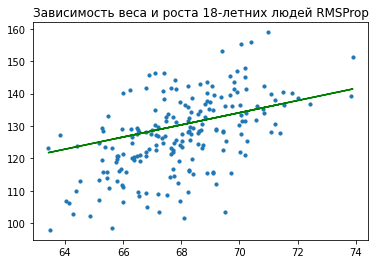

In [42]:
def shocasticGDRMS(batch_size, points, start_coeffs, lr=0.1, epoch = 100, diff=False):
    i = 0
    gamma = 0.9
    coeffs = start_coeffs
    print(MSE(points, coeffs), "<- start MSE")
    V_prev=coeffs
    diffs = []
    while i < epoch:
      prev_coeffs = coeffs
      V = gamma * V_prev + (1 - gamma) * np.square(grad_MSE(points, prev_coeffs, batch_size))
      sum_prev = sum
      coeffs -= lr * np.divide(grad_MSE(points, prev_coeffs, batch_size), np.sqrt(V))
      random.shuffle(points)
      diffs.append(coeffs)
      i += 1
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs

wh_points = get_wh_points()
res_coeffs = shocasticGDRMS(len(wh_points) // 2, wh_points, np.array([0.1, 0.1]))
X = []
Y = []
print(res_coeffs, "<- res")
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, wh_points, "Зависимость веса и роста 18-летних людей RMSProp")
except FileNotFoundError:
  print("File wasn't uploaded")

Аналогично предыдущему методу: с увеличением константы всё работает, но с констанотой из первых 2-ух методов всё плохо :(

Adam (adaptive moment estimation)


2923678.9014039994 <- start MSE
5027233.630577959 <- min MSE
[4.17180347 1.97615272] <- res


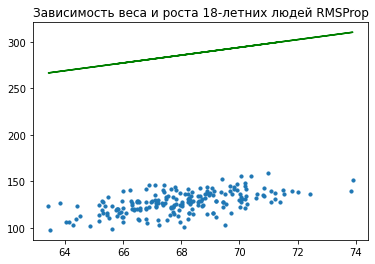

In [43]:
def shocasticAdam(batch_size, points, start_coeffs, lr=0.1, epoch = 100, diff=False):
    i = 0
    gamma = 0.9
    coeffs = start_coeffs
    td_prev = start_coeffs
    beta = 0.8
    print(MSE(points, coeffs), "<- start MSE")
    V_prev=coeffs
    diffs = []
    while i < epoch:
      prev_coeffs = coeffs
      td = beta * td_prev + (1 - beta) * grad_MSE(points, prev_coeffs, batch_size)
      V = gamma * V_prev + (1 - gamma) * np.square(grad_MSE(points, prev_coeffs, batch_size))
      coeffs -= lr * np.divide(td, np.sqrt(V) + 1E-8)
      random.shuffle(points)
      i += 1
      diffs.append(coeffs)
    print(MSE(points, coeffs), "<- min MSE")
    res_coeffs = coeffs
    if diff:
      return coeffs, diffs
    else:
      return coeffs

wh_points = get_wh_points()
res_coeffs = shocasticAdam(len(wh_points) // 2, wh_points, np.array([0.1, 0.1]))
X = []
Y = []
print(res_coeffs, "<- res")
for i in get_wh_points():
  X.append(i[0])

for i in X:
  Y.append(i * res_coeffs[0] + res_coeffs[1])

try:
  show_points_and_line(X, Y, wh_points, "Зависимость веса и роста 18-летних людей RMSProp")
except FileNotFoundError:
  print("File wasn't uploaded")

Аналогично предыдущему методу: с увеличением константы всё работает, но с констанотой из первых 2-ух методов всё плохо :(

# Задание 5

In [44]:


ADAM_with_diff = shocasticAdam(len(wh_points) // 2, wh_points, np.array([0.1, 0.1]), 0.1, 100, True)

print(ADAM_with_diff)

2923678.9014040004 <- start MSE
21435.936717994842 <- min MSE
(array([ 1.89480998, -1.86598079]), [array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.86598079]), array([ 1.89480998, -1.865